# k-means法を用いて色空間を圧縮する

In [28]:
import cv2
import numpy as np
lena = cv2.imread('data/lena.jpg', cv2.IMREAD_COLOR)
import matplotlib.pyplot as plt
plt.style.use('ggplot') 

In [29]:
plt.rc('axes', **{'grid':False})

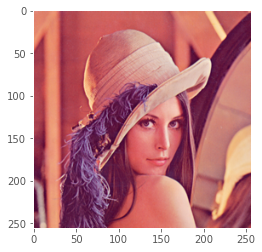

In [30]:
plt.imshow(cv2.cvtColor(lena, cv2.COLOR_BGR2RGB))

In [31]:
lena.shape

(256, 256, 3)

In [32]:
img_data = lena / 255.0
img_data = img_data.reshape((-1, 3))
img_data.shape

(65536, 3)

In [37]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    pixel = data[i].T
    R, G, B = pixel[0], pixel[1], pixel[2]
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))
    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
    fig.suptitle(title, size=20);

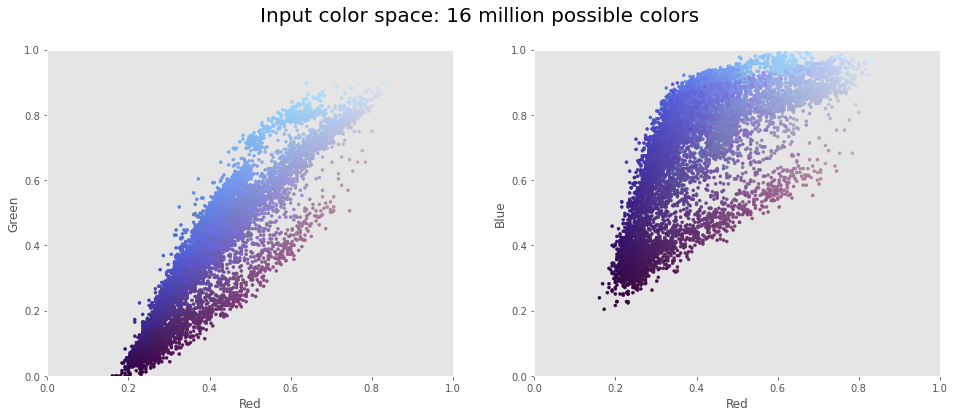

In [38]:
plot_pixels(img_data, title='Input color space: 16 million possible colors')

# k-means法を利用してカラーパレットを縮小する

In [40]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
flags = cv2.KMEANS_RANDOM_CENTERS
img_data = img_data.astype(np.float32)
compactness, labels, centers = cv2.kmeans(img_data, 16, None, criteria, 10, flags)

In [41]:
centers

array([[0.47163936, 0.49150154, 0.7984845 ],
       [0.7607843 , 0.57058823, 0.6       ],
       [0.74509805, 0.5058824 , 0.627451  ],
       [0.30106992, 0.15430069, 0.4498623 ],
       [0.7295308 , 0.6128344 , 0.6885326 ],
       [0.63963586, 0.46050414, 0.6922969 ],
       [0.3800045 , 0.3947881 , 0.8344764 ],
       [0.34417757, 0.28704435, 0.67064697],
       [0.68908983, 0.51855206, 0.6540975 ],
       [0.7039216 , 0.5372549 , 0.6127451 ],
       [0.67865455, 0.78334224, 0.92304784],
       [0.24096125, 0.07333349, 0.34844965],
       [0.5854767 , 0.64805835, 0.8662061 ],
       [0.6182491 , 0.53341943, 0.6765428 ],
       [0.45089445, 0.55177414, 0.9048975 ],
       [0.60601777, 0.41694382, 0.5777974 ]], dtype=float32)

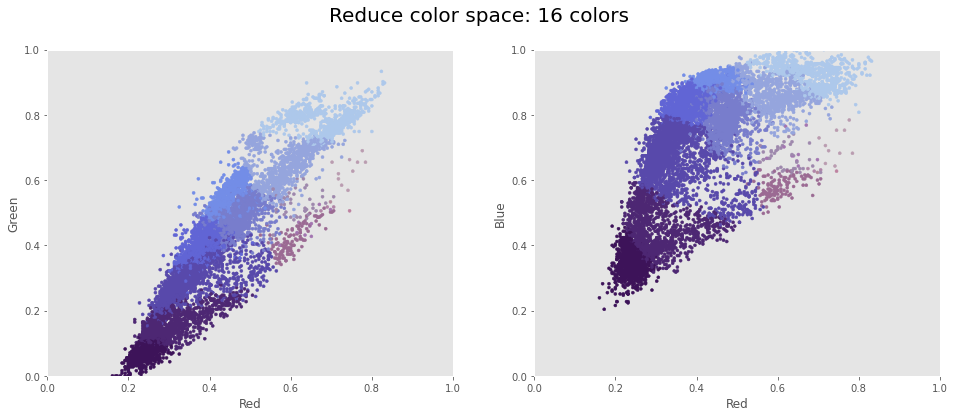

In [43]:
new_colors = centers[labels].reshape((-1, 3))
plot_pixels(img_data, colors=new_colors, title="Reduce color space: 16 colors")

In [45]:
lena_recolored = new_colors.reshape(lena.shape)

Text(0.5, 1.0, '16-color image')

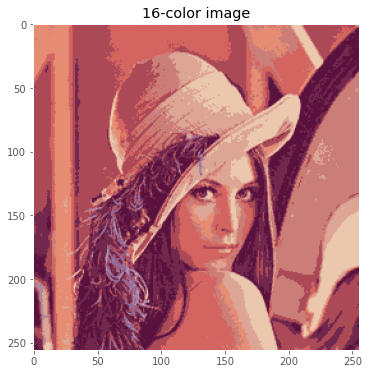

In [46]:
plt.figure(figsize=(16, 6))
plt.imshow(cv2.cvtColor(lena_recolored, cv2.COLOR_BGR2RGB));
plt.title('16-color image')